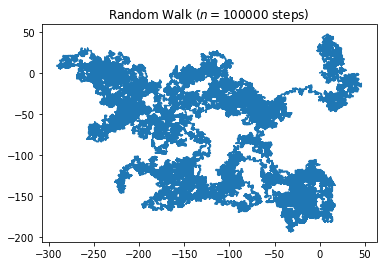

In [12]:
# Python code for 2D random walk. 
import numpy 
import pylab 
import random 
  
# defining the number of steps 
n = 100000
  
#creating two array for containing x and y coordinate 
#of size equals to the number of size and filled up with 0's 
x = numpy.zeros(n) 
y = numpy.zeros(n) 
  
# filling the coordinates with random variables 
for i in range(1, n): 
    val = random.randint(1, 4) 
    if val == 1: 
        x[i] = x[i - 1] + 1
        y[i] = y[i - 1] 
    elif val == 2: 
        x[i] = x[i - 1] - 1
        y[i] = y[i - 1] 
    elif val == 3: 
        x[i] = x[i - 1] 
        y[i] = y[i - 1] + 1
    else: 
        x[i] = x[i - 1] 
        y[i] = y[i - 1] - 1
      
  
# plotting stuff: 
pylab.title("Random Walk ($n = " + str(n) + "$ steps)") 
pylab.plot(x, y) 
pylab.savefig("rand_walk"+str(n)+".png",bbox_inches="tight",dpi=600) 
pylab.show() 


Populating the interactive namespace from numpy and matplotlib


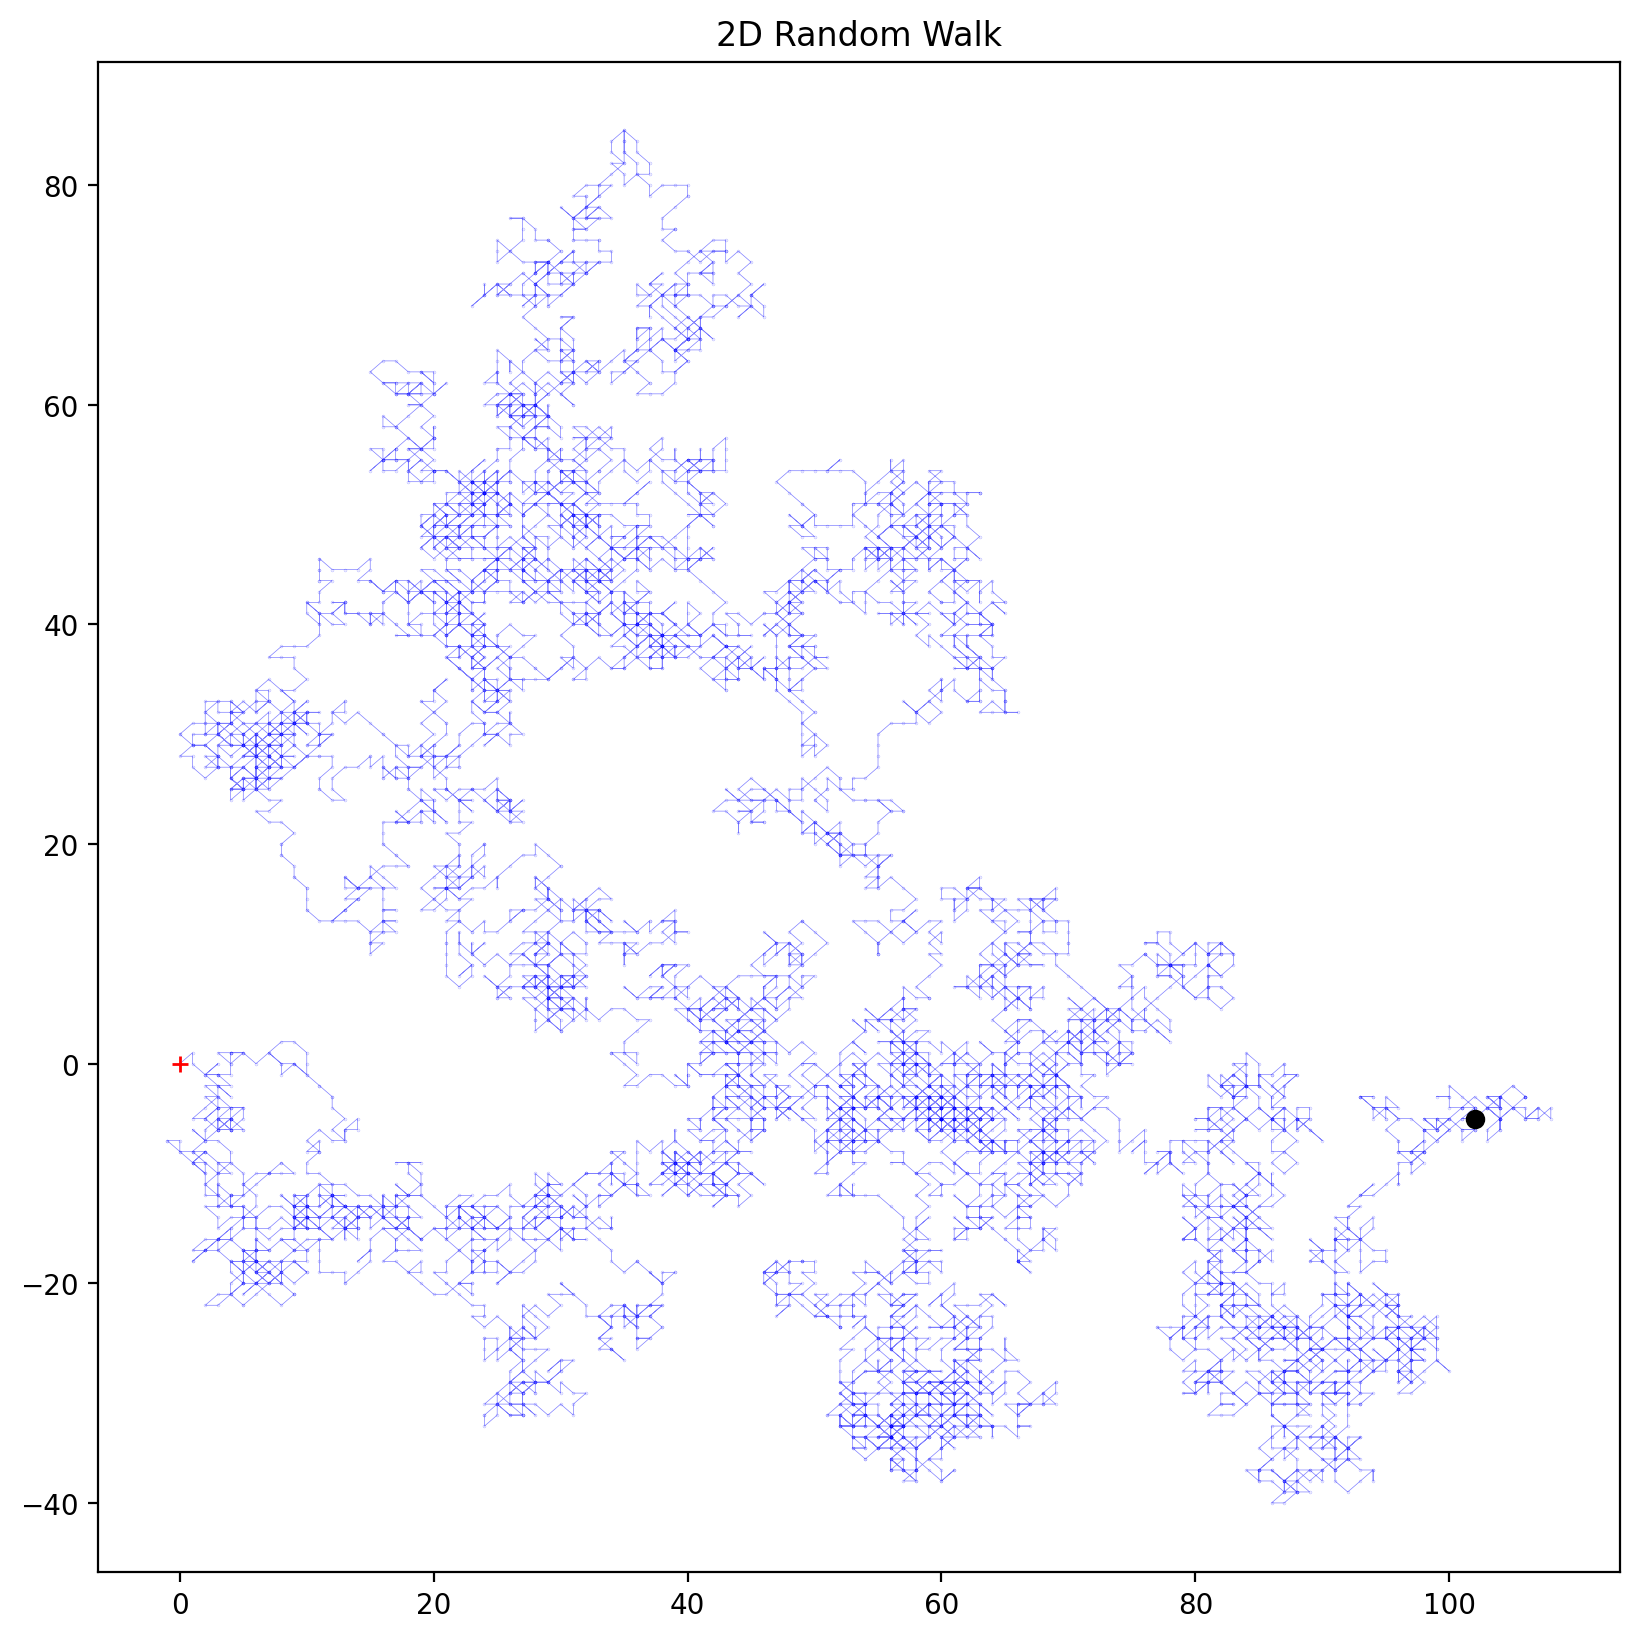

In [37]:
%pylab inline
from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
# Define parameters for the walk

dims = 2
step_n = 10000
step_set = [-1, 0, 1]
origin = np.zeros((1,dims))
# Simulate steps in 2D
step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1]
stop = path[-1:]
# Plot the path
fig = plt.figure(figsize=(8,8),dpi=200)
ax = fig.add_subplot(111)
ax.scatter(path[:,0], path[:,1],c='blue',alpha=0.25,s=0.05);
ax.plot(path[:,0], path[:,1],c='blue',alpha=0.5,lw=0.25,ls='-');
ax.plot(start[:,0], start[:,1],c='red', marker='+')
ax.plot(stop[:,0], stop[:,1],c='black', marker='o')
plt.title('2D Random Walk')
plt.tight_layout(pad=0)
plt.savefig('random_walk_2d.png',dpi=250);

MovieWriter imagemagick unavailable; using Pillow instead.


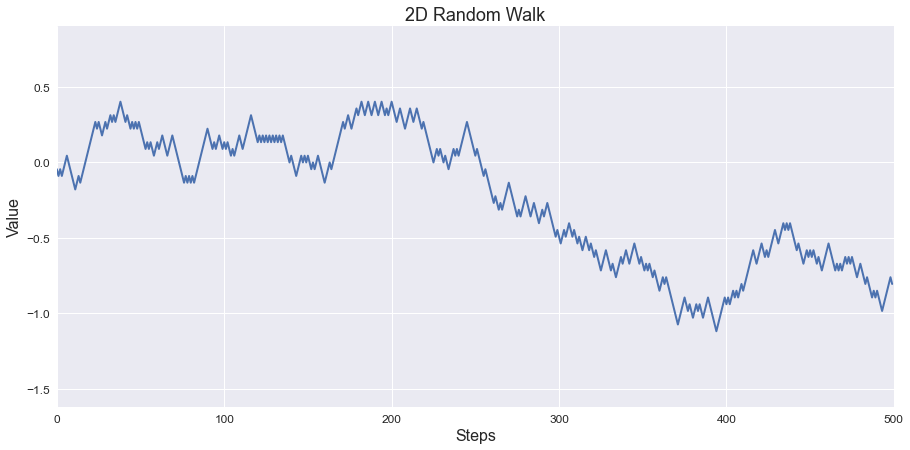

In [41]:
import numpy as np
np.random.seed(1234)

def random_walk(N):
    """
    Simulates a discrete random walk
    :param int N : the number of steps to take
    """
    # event space: set of possible increments
    increments = np.array([1, -1])
    # the probability to generate 1
    p=0.5

    # the epsilon values
    random_increments = np.random.choice(increments, N, p)
    # calculate the random walk
    random_walk = np.cumsum(random_increments)

    # return the entire walk and the increments
    return random_walk, random_increments

# generate a random walk
N = 500
X, epsilon = random_walk(N)

# normalize the random walk using the Central Limit Theorem
X = X * np.sqrt(1./N)
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use('seaborn')

#general figure options
fig = plt.figure(figsize=(15, 7))
ax = plt.axes(xlim=(0, N), ylim=(np.min(X) - 0.5, np.max(X) + 0.5))
line, = ax.plot([], [], lw=2)
ax.set_title('2D Random Walk', fontsize=18)
ax.set_xlabel('Steps', fontsize=16)
ax.set_ylabel('Value', fontsize=16)
ax.tick_params(labelsize=12)

# initialization function 
def init():
    # creating an empty plot/frame 
    line.set_data([], [])
    return line,

# lists to store x and y axis points 
xdata, ydata = [], []

# animation function 
def animate(i):
    # x, y values to be plotted 
    y = X[i]

    # appending new points to x, y axes points list 
    xdata.append(i)
    ydata.append(y)
    line.set_data(xdata, ydata)
    return line,

# call the animator	 
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=N, interval=20, blit=True)
# save the animation as mp4 video file 
anim.save('random_walk.gif',writer='imagemagick')